In [43]:
# import  libraries
import numpy as np
import pandas as pd
import statsmodels as sm
import matplotlib as plt
import seaborn as sns
%matplotlib inline
import datetime as dt

In [44]:
# data set form UCI data set as link: https://archive.ics.uci.edu/ml/datasets/Online+Retail
# and some method  I learn from https://www.youtube.com/watch?v=fdUofaT8gUw 
raw_data = pd.read_csv('C:/Users/USER/Desktop/data scient sheet/UCI DATA SET/Custer/Online Retails/online Retail.csv')
raw_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [45]:
data_copy = raw_data.copy()
data_copy.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/2011 12:50,4.95,12680.0,France


In [46]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [47]:
# clean data
data_copy.dropna(inplace = True)

In [48]:
data_drop = data_copy
data_drop.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [49]:
data_drop.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [50]:
# we find quantity is negative # Negative inventory in retail means the stock of any particular item is less than zero in your system. When you record a sales transaction for such an item, the system inventory for that item will become negative
# that must to fix to positive
data_drop = data_drop[(data_drop['Quantity']>0)]

In [62]:
# chang type of data
pd.options.mode.chained_assignment = None  # default='warn' because working with is already a slice of some larger data frame. Pandas is simply warning you that you are working with the slice and not the full data.
data_drop.loc['InvoiceDate'] = pd.to_datetime(data_drop.loc['InvoiceDate'])

# Analysis Data

In [64]:
data_drop.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Diff'],
      dtype='object')

In [69]:
data_drop['CustomerID'] = data_drop['CustomerID'].astype(str)
data_count =  data_drop[['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'Country']].value_counts()
tableA = pd.DataFrame(data_count, columns=["Count Value"])
tableA.head()

Count Value
InvoiceNo StockCode Description                         Quantity InvoiceDate         UnitPrice Country                    
555524    22698     PINK REGENCY TEACUP AND SAUCER      1        2011-06-05 11:37:00 2.95      United Kingdom           20
          22697     GREEN REGENCY TEACUP AND SAUCER     1        2011-06-05 11:37:00 2.95      United Kingdom           12
572861    22775     PURPLE DRAWERKNOB ACRYLIC EDWARDIAN 12       2011-10-26 12:46:00 1.25      United Kingdom            8
578289    23395     BELLE JARDINIERE CUSHION COVER      1        2011-11-23 14:07:00 3.75      United Kingdom            6
540524    21756     BATH BUILDING BLOCK WORD            1        2011-01-09 12:53:00 5.95      United Kingdom            6

In [66]:
tableA.shape

(392732, 1)

1     387923
2       4523
3        234
4         38
6          6
5          5
8          1
12         1
20         1
Name: Count Value, dtype: int64


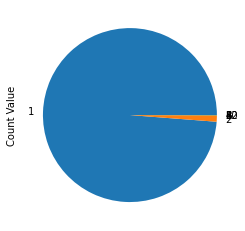

In [67]:
print(tableA['Count Value'].value_counts())
tableA['Count Value'].value_counts().plot.pie();
# we can know type by customer id but it  have a lot then must use statstic and modeling helps

# RFM technic

In [78]:
#Add new column depicting total amount
data_drop['Total_Price'] = data_drop['Quantity'] * data_drop['UnitPrice']
data_drop.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373 days 04:24:00,15.3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373 days 04:24:00,22.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373 days 04:24:00,20.34


In [206]:
data_drop.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff,Total_Price
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,0 days,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days,16.6
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0 days,14.85
InvoiceDate,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaN


In [207]:
# drop eror value
data_drop.drop('InvoiceDate', axis=0, inplace=True )

In [208]:
data_drop.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Diff,Total_Price
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,0 days,10.2
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.1,12680.0,France,0 days,12.6
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days,16.6
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,0 days,16.6
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,0 days,14.85


In [209]:
# create Recency
# find a last date and last invovice
xll = data_drop['InvoiceDate'].max()
xll

Timestamp('2011-12-09 12:50:00')

In [210]:
#Set Latest date 2011-12-10 calculate number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

In [211]:
#Create RFM Modelling scores for each customer
# Create unname funtion by  lambda
RFMScores = data_drop.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: x.count(), 'Total_Price': lambda x: x.sum()})

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'Total_Price': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [212]:
RFMScores.tail()

,Recency,Frequency,Monetary
CustomerID,,,
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05
18283.0,3,756,2094.88
18287.0,42,70,1837.28


In [213]:
RFMScores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4339 non-null   int64  
 1   Frequency  4339 non-null   int64  
 2   Monetary   4339 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.6+ KB


In [214]:
RFMScores.Recency.describe()

count    4339.000000
mean       92.041484
std       100.007757
min         0.000000
25%        17.000000
50%        50.000000
75%       141.500000
max       373.000000
Name: Recency, dtype: float64

D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



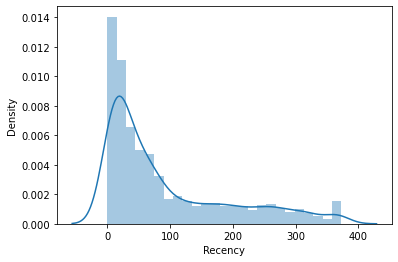

In [215]:
x1 = RFMScores['Recency']
pltR = sns.distplot(x1)

D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



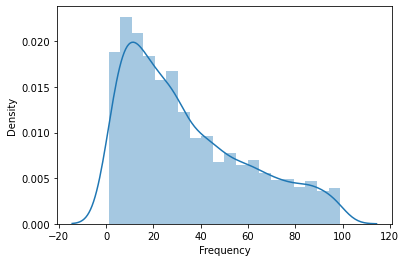

In [216]:
#Frequency distribution plot, taking observations which have frequency less than 1000
x2 = RFMScores.query('Frequency < 100')['Frequency']
pltF = sns.distplot(x2)

D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



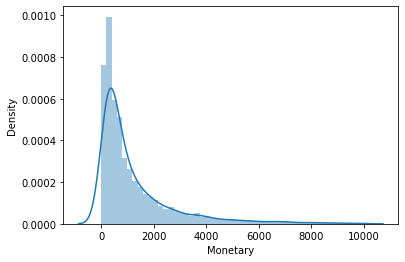

In [217]:
#Monateray distribution plot, taking observations which have monetary value less than 10000
x3 = RFMScores.query('Monetary < 10000')['Monetary']
plt = sns.distplot(x3)

In [218]:
#Split into four segments using quantiles
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [219]:
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.6400000000003}}

In [220]:
#Functions to create R, F and M segments by quantiles
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [221]:
#Calculate Add R, F and M segment value columns.
RFMScores['R'] = RFMScores['Recency'].apply(RScore, args=('Recency',quantiles,))
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScore, args=('Frequency',quantiles,))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScore, args=('Monetary',quantiles,))
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [223]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFMScores['RFMGroup'] = RFMScores.R.map(str) + RFMScores.F.map(str) + RFMScores.M.map(str)

#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFMScores['RFMScore'] = RFMScores[['R', 'F', 'M']].sum(axis = 1)
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [224]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [225]:


#Validate the data for RFMGroup = 222
RFMScores[RFMScores['RFMGroup']=='222'].sort_values('Monetary', ascending=False).reset_index().head(10)



,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12398.0,45,85,1635.66,2,2,2,222,6,Gold
1,15791.0,43,75,1612.69,2,2,2,222,6,Gold
2,14312.0,46,87,1611.59,2,2,2,222,6,Gold
3,15660.0,25,90,1600.86,2,2,2,222,6,Gold
4,16676.0,33,89,1592.12,2,2,2,222,6,Gold
5,13186.0,39,79,1575.89,2,2,2,222,6,Gold
6,12865.0,26,95,1568.23,2,2,2,222,6,Gold
7,15111.0,29,84,1567.48,2,2,2,222,6,Gold
8,13313.0,22,78,1555.32,2,2,2,222,6,Gold
9,13107.0,44,58,1531.62,2,2,2,222,6,Gold


In [226]:
# plot segment of customer ranks
import plotly.offline as po
import plotly.graph_objs as gobj

#Recency Vs Frequency
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Frequency"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Frequency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Frequency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Frequency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

#Recency Vs Monetary
graph = RFMScores.query("Monetary < 50000 and Frequency < 2000")

plot_data = [
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Bronze'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Bronze'")['Monetary'],
        mode='markers',
        name='Bronze',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Silver'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Silver'")['Monetary'],
        mode='markers',
        name='Silver',
        marker= dict(size= 9,
            line= dict(width=1),
            color= 'green',
            opacity= 0.5
           )
    ),
        gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Gold'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Gold'")['Monetary'],
        mode='markers',
        name='Gold',
        marker= dict(size= 11,
            line= dict(width=1),
            color= 'red',
            opacity= 0.9
           )
    ),
    gobj.Scatter(
        x=graph.query("RFM_Loyalty_Level == 'Platinum'")['Recency'],
        y=graph.query("RFM_Loyalty_Level == 'Platinum'")['Monetary'],
        mode='markers',
        name='Platinum',
        marker= dict(size= 13,
            line= dict(width=1),
            color= 'black',
            opacity= 0.9
           )
    ),
]

plot_layout = gobj.Layout(
        yaxis= {'title': "Monetary"},
        xaxis= {'title': "Recency"},
        title='Segments'
    )
fig = gobj.Figure(data=plot_data, layout=plot_layout)
po.iplot(fig)

In [ ]:
# find  with RFM when we plot graph it show graph relative of "Monetary&Recency" like"Monetary&Frequency"  after that we use K-mean and elbow method 
# to define class 


# K-Means Clustering

In [227]:
#Handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num <= 0:
        return 1
    else:
        return num
#Apply handle_neg_n_zero function to Recency and Monetary columns 
RFMScores['Recency'] = [handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary'] = [handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform Log transformation to bring data into normal or near normal distribution
Log_Data = RFMScores[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)



D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



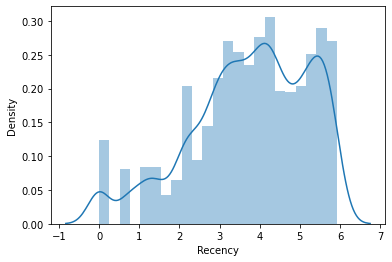

In [228]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Data['Recency']
f1 = sns.distplot(Recency_Plot)

D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



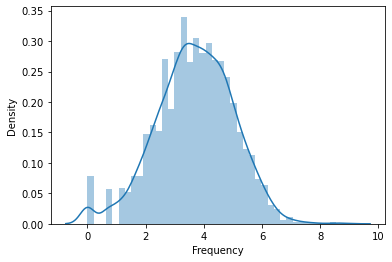

In [229]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Data['Frequency']
f2 = sns.distplot(Frequency_Plot)

D:\ANACONDA3.8\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



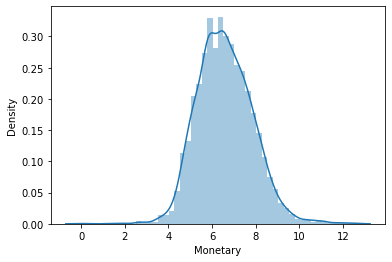

In [263]:
Monetary_Plot = Log_Data.query('Monetary < 10000')['Monetary']
f3 = sns.distplot(Monetary_Plot)

In [243]:
# Feature Scale

from sklearn.preprocessing import StandardScaler

#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(Log_Data)

#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = RFMScores.index, columns = Log_Data.columns)

In [244]:
Scaled_Data.tail()

,Recency,Frequency,Monetary
CustomerID,,,
18280.0,1.279986,-1.037153,-1.101776
18281.0,0.987655,-1.306224,-1.737567
18282.0,-1.214664,-0.899980,-1.112847
18283.0,-1.789152,2.222600,0.836436
18287.0,0.000783,0.428794,0.732843


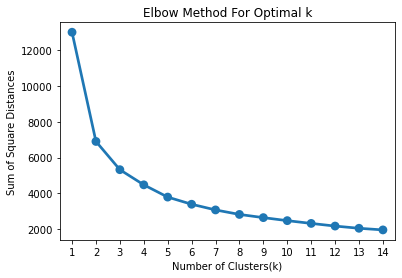

In [245]:


from sklearn.cluster import KMeans

sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()



In [269]:
#Perform K-Mean Clustering or build the K-Means clustering model
KMean_clust = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000, random_state=74)
KMean_clust.fit(Scaled_Data)

#Find the clusters for the observation given in the dataset
RFMScores['Cluster'] = KMean_clust.labels_
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0,red
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,1,green
12348.0,75,31,1797.24,3,3,1,331,7,Gold,0,red
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,0,red
12350.0,310,17,334.40,4,4,3,443,11,Bronze,2,blue


<Figure size 1152x504 with 0 Axes>

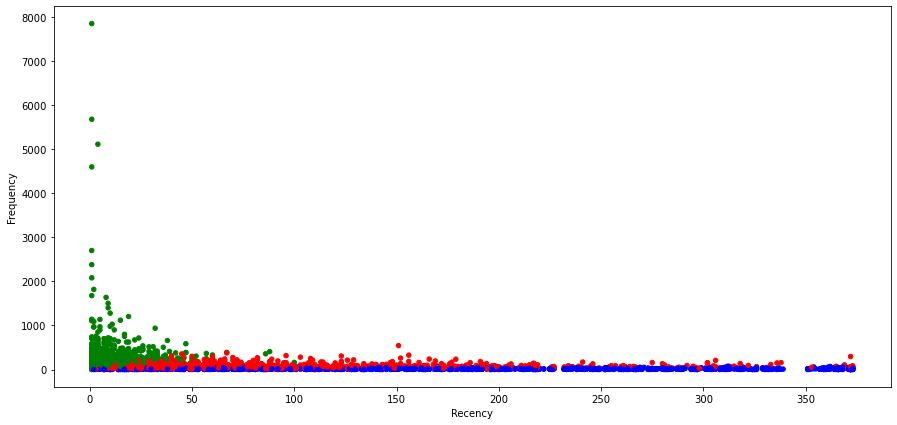

In [276]:

from matplotlib import pyplot as plt
plt.figure(figsize=(16,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(15,7),
    c = RFMScores['Color'] )

In [261]:
RFMScores.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,0,red
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,1,green
12348.0,75,31,1797.24,3,3,1,331,7,Gold,0,red
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,0,red
12350.0,310,17,334.40,4,4,3,443,11,Bronze,2,blue


In [262]:
RFMScores.tail()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
18280.0,277,10,180.60,4,4,4,444,12,Bronze,2,blue
18281.0,180,7,80.82,4,4,4,444,12,Bronze,2,blue
18282.0,7,12,178.05,1,4,4,144,9,Silver,2,blue
18283.0,3,756,2094.88,1,1,1,111,3,Platinum,1,green
18287.0,42,70,1837.28,2,2,1,221,5,Platinum,0,red
